In [42]:
import pandas as pd

dados = pd.read_csv('healthcare-dataset-stroke-data.csv', sep = ",")
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Descritiva

In [43]:
dados.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Transformando a base

In [45]:
dados.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [46]:
dados.shape

(5110, 12)

In [47]:
(201/5110) * 100

3.9334637964774952

In [48]:
media_bmi = dados.bmi.mean()

In [49]:
dados.loc[(dados['bmi'].isna()) , 'bmi'] = media_bmi

In [50]:
dados.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [51]:
dados.drop(columns = ['id'], inplace = True)

In [52]:
for col in dados.columns:
    print(f"Coluna: {col}")
    print(dados[col].unique())
    print("-"*30)

Coluna: gender
['Male' 'Female' 'Other']
------------------------------
Coluna: age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.4

In [53]:
def plot(dataset,coluna):
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,10))
    sns.histplot(data=dataset[coluna], kde=True, bins=30, color = 'darkorange')
    plt.xlabel(coluna, fontsize=16)
    plt.ylabel('Frequência', fontsize=16)
    plt.show()

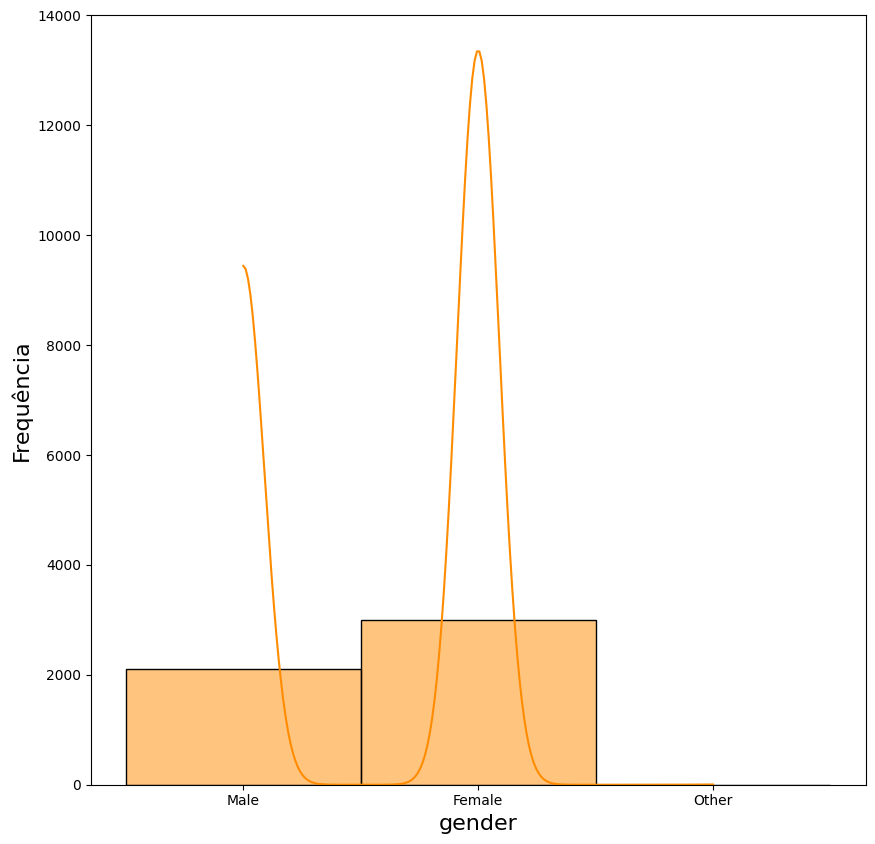

In [54]:
plot(dados,'gender')

In [55]:
dados.loc[(dados['gender'] == 'Other') , 'gender'] = 'Female'

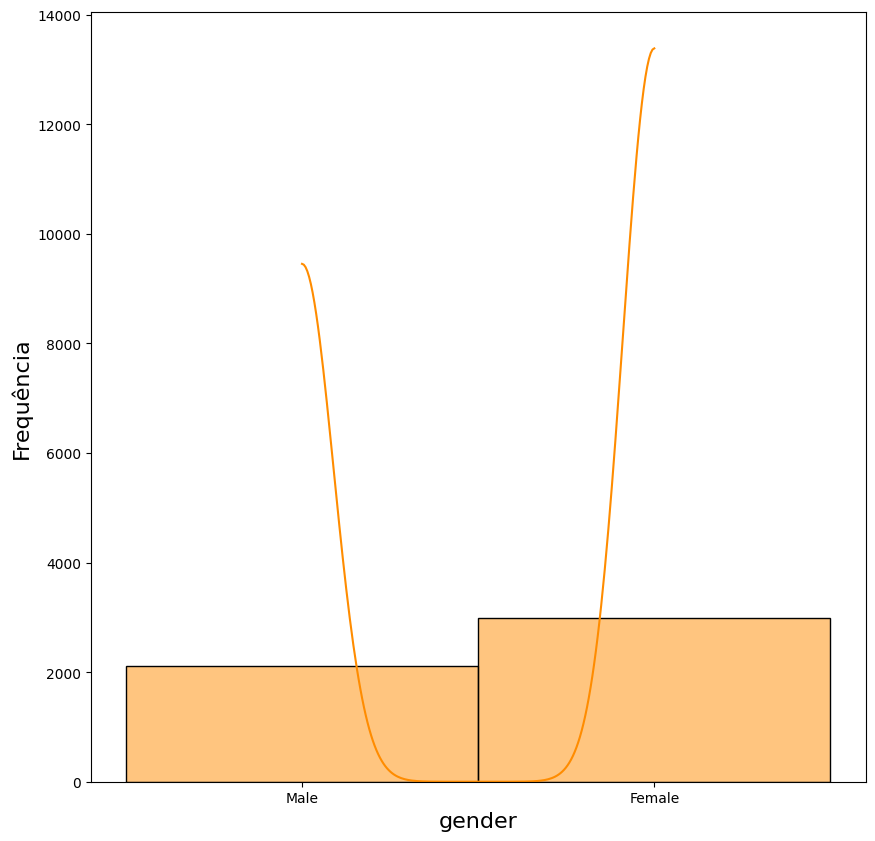

In [56]:
plot(dados,'gender')

In [57]:
dados.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

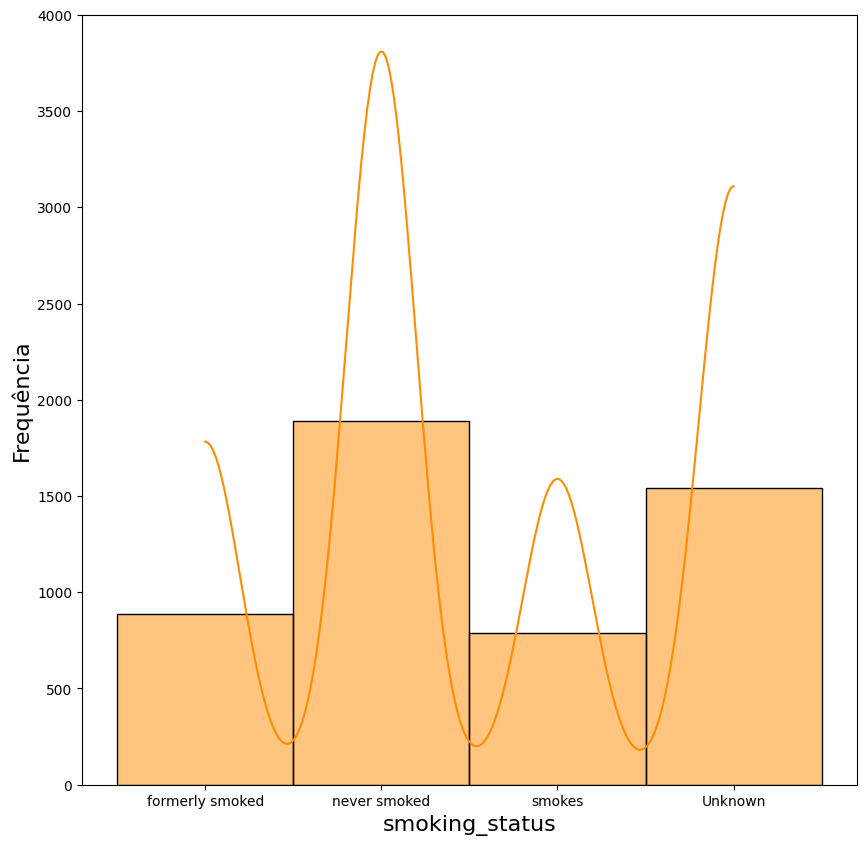

In [58]:
plot(dados,'smoking_status')

In [59]:
dados.loc[(dados['smoking_status'] == 'Unknown') , 'smoking_status'] = dados['smoking_status'].value_counts().idxmax()

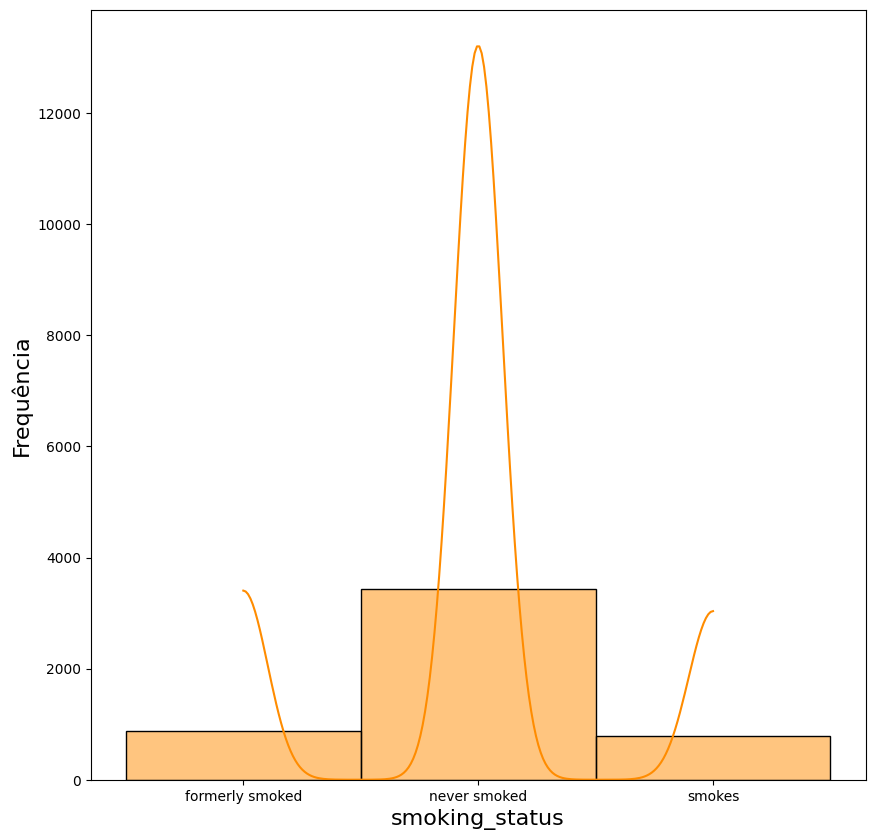

In [60]:
plot(dados,'smoking_status')

In [61]:
colunas = dados.drop(columns=['age','hypertension','heart_disease','avg_glucose_level','stroke','bmi']).columns

dados = pd.get_dummies(data= dados, columns=colunas, drop_first = True, sparse= '_')
dados.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,1,0


In [68]:
dados.columns = dados.columns.str.replace(' ', '')
dados.columns = dados.columns.str.replace('-', '_')

In [66]:
dados.shape

(5110, 15)

## Regressão

In [63]:
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats # estatística chi2
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
import plotly.graph_objs as go # gráfico 3D
import statsmodels.formula.api as smf # estimação do modelo logístico binário

import warnings

In [69]:
#Sugestão de uso neste caso, dada a existência de muitas dummies no dataset
# Definição da fórmula utilizada no modelo
lista_colunas = list(dados.drop(columns=['stroke']).columns)

formula_dummies_modelo = ' + '.join(lista_colunas)

formula_dummies_modelo = "stroke ~ " + formula_dummies_modelo

print("Fórmula utilizada: ",formula_dummies_modelo)

#Modelo propriamente dito
modelo = sm.Logit.from_formula(formula_dummies_modelo,
                                               dados).fit()

#Parâmetros do modelo
modelo.summary()

Fórmula utilizada:  stroke ~ age + hypertension + heart_disease + avg_glucose_level + bmi + gender_Male + ever_married_Yes + work_type_Never_worked + work_type_Private + work_type_Self_employed + work_type_children + Residence_type_Urban + smoking_status_neversmoked + smoking_status_smokes
         Current function value: 0.154748
         Iterations: 35


C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5095
Method:                           MLE   Df Model:                           14
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.2054
Time:                        13:30:40   Log-Likelihood:                -790.76
converged:                      False   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.734e-78
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.8106      0.614    -12.721      0.000      -9.014      -6.607
age                            0.0750      0.006     12.838      0.000       0.064       0.086
hypertension                   0.3876      0.164      2.367      0.018       0.067       0.709
heart_disease                  0.2840      0.191      1.487      0.137      -0.090       0.658
avg_glucose_level              0.0039      0.001      3.295      0.001       0.002       0.006
bmi                            0.0035      0.011      0.314      0.754      -0.019       0.026
gender_Male                    0.0190      0.142      0.134      0.893      -0.259       0.297
ever_married_Yes              -0.1836      0.225     -0.815      0.415      -0.625       0.258
work_type_Never_worked       -13.7523   4581.759     -0.003      0.998   -8993.834    8966.330
work_type_Private              0.1459      0.206      0.706      0.480      -0.259       0.550
work_type_Self_employed       -0.2317      0.234     -0.991      0.321      -0.690       0.226
work_type_children             1.0503      0.830      1.266      0.206      -0.576       2.677
Residence_type_Urban           0.0859      0.138      0.622      0.534      -0.185       0.357
smoking_status_neversmoked    -0.1616      0.162     -0.995      0.320      -0.480       0.157
smoking_status_smokes          0.1136      0.215      0.528      0.598      -0.308       0.536
==============================================================================================
"""

In [70]:
from statstests.process import stepwise

#Estimação do modelo por meio do procedimento Stepwise
step_modelo = stepwise(modelo, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 stroke ~ Q('age') + Q('hypertension') + Q('heart_disease') + Q('avg_glucose_level') + Q('bmi') + Q('gender_Male') + Q('ever_married_Yes') + Q('work_type_Never_worked') + Q('work_type_Private') + Q('work_type_Self_employed') + Q('work_type_children') + Q('Residence_type_Urban') + Q('smoking_status_neversmoked') + Q('smoking_status_smokes')
         Current function value: 0.154748
         Iterations: 35

 Discarding atribute "Q('work_type_Never_worked')" with p-value equal to 0.9976051254333724 

Estimating model...: 
 stroke ~ Q('age') + Q('hypertension') + Q('heart_disease') + Q('avg_glucose_level') + Q('bmi') + Q('gender_Male') + Q('ever_married_Yes') + Q('work_type_Private') + Q('work_type_Self_employed') + Q('work_type_children') + Q('Residence_type_Urban') + Q('smoking_status_neversmoked') + Q('smoking_status_smokes')
Optimization terminated successfully.
         Current function value: 0.154757
         Iterations 10

 Discarding 

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.154833
         Iterations 10

 Discarding atribute "Q('work_type_Private')" with p-value equal to 0.48014262510476535 

Estimating model...: 
 stroke ~ Q('age') + Q('hypertension') + Q('heart_disease') + Q('avg_glucose_level') + Q('ever_married_Yes') + Q('work_type_Self_employed') + Q('work_type_children') + Q('smoking_status_neversmoked')
Optimization terminated successfully.
         Current function value: 0.154883
         Iterations 10

 Discarding atribute "Q('ever_married_Yes')" with p-value equal to 0.41262200036522245 

Estimating model...: 
 stroke ~ Q('age') + Q('hypertension') + Q('heart_disease') + Q('avg_glucose_level') + Q('work_type_Self_employed') + Q('work_type_children') + Q('smoking_status_neversmoked')
Optimization terminated successfully.
         Current function value: 0.154947
         Iterations 10

 Discarding atribute "Q('work_type_children')" with p-value equal to 0.19764725762905822 

In [71]:
summary_col([modelo, step_modelo],
            model_names=["MODELO INICIAL","MODELO STEPWISE"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO INICIAL,MODELO STEPWISE
Intercept,-7.8106***,-7.6576***
,(0.6140),(0.3604)
Q('age'),,0.0734***
,,(0.0053)
Q('avg_glucose_level'),,0.0042***
,,(0.0012)
Q('hypertension'),,0.3992**
,,(0.1625)
Q('work_type_Self_employed'),,-0.3442**
,,(0.1613)


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

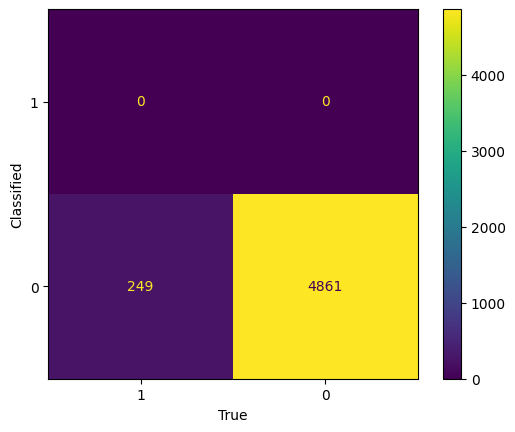

,Sensitividade,Especificidade,Acurácia
0,0.0,1.0,0.951272


In [73]:
# Adicionando os valores previstos de probabilidade na base de dados
dados['phat'] = step_modelo.predict()

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=dados['stroke'],
                predicts=dados['phat'],
                cutoff=0.50)

In [74]:
def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [75]:
dados_plotagem = espec_sens(observado = dados['stroke'],
                            predicts = dados['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,0.979920,0.402798
2,0.02,0.947791,0.541247
3,0.03,0.911647,0.623123
4,0.04,0.863454,0.687101
...,...,...,...
96,0.96,0.000000,1.000000
97,0.97,0.000000,1.000000
98,0.98,0.000000,1.000000
99,0.99,0.000000,1.000000


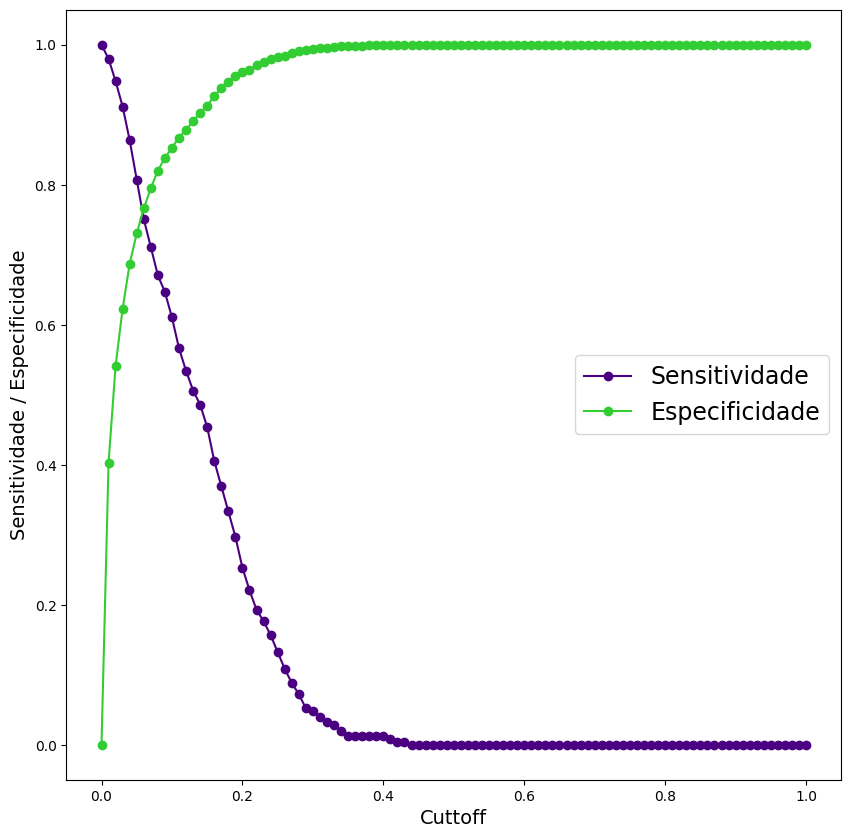

In [76]:
plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color='indigo')
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=14)
plt.ylabel('Sensitividade / Especificidade', fontsize=14)
plt.show()

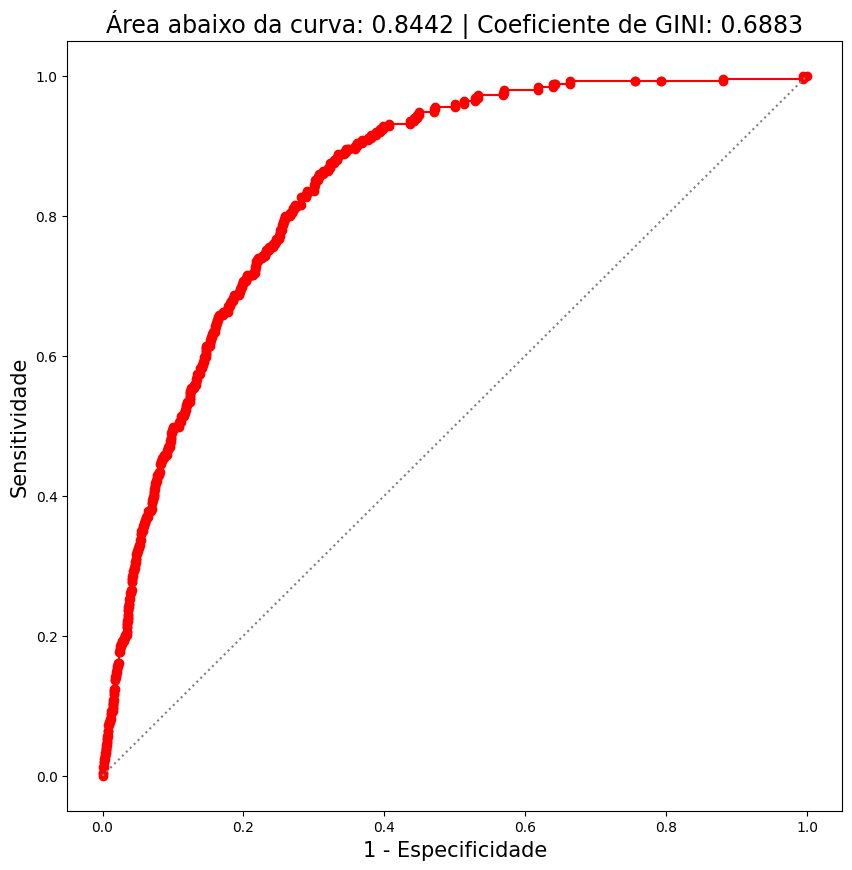

In [78]:
from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(dados['stroke'],
                                dados['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color='red')
plt.plot(fpr,fpr, ':', color='gray')
plt.title('Área abaixo da curva: %g' % round(roc_auc,4) +
          ' | Coeficiente de GINI: %g' % round(gini,4), fontsize=17)
plt.xlabel('1 - Especificidade', fontsize=15)
plt.ylabel('Sensitividade', fontsize=15)
plt.show()

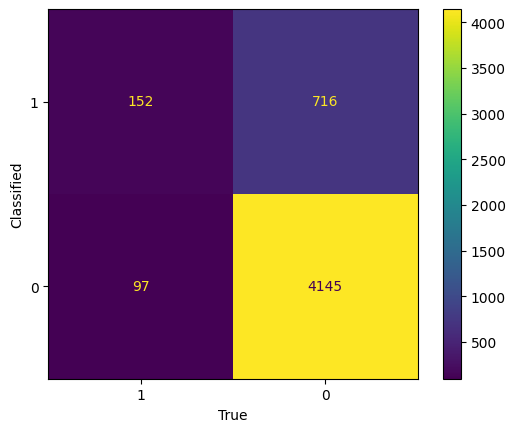

,Sensitividade,Especificidade,Acurácia
0,0.610442,0.852705,0.8409


In [79]:
dados['phat'] = step_modelo.predict()

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=dados['stroke'],
                predicts=dados['phat'],
                cutoff=0.10)

### Balanceamento dos dados

In [80]:
pd.Series(dados['stroke']).value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [89]:
from imblearn.under_sampling import RandomUnderSampler

x = dados.drop(['stroke'], axis = 1)
y = dados['stroke']

rus = RandomUnderSampler()

x, y = rus.fit_resample(x, y)

In [90]:
pd.Series(y).value_counts()

0    249
1    249
Name: stroke, dtype: int64

In [91]:
dados = pd.concat([y, x], axis=1)
dados.head()

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_neversmoked,smoking_status_smokes,phat
1953,0,72.0,0,1,74.36,27.3,1,1,0,0,1,0,0,1,0,0.082981
2140,0,29.0,0,0,62.47,34.4,0,0,0,0,1,0,0,0,0,0.003654
3485,0,39.0,1,0,71.66,28.7,1,1,0,0,1,0,1,1,0,0.011700
2156,0,55.0,0,0,59.20,43.8,0,1,0,0,1,0,1,1,0,0.023790
1942,0,10.0,0,0,88.69,30.4,1,0,0,0,0,1,1,1,0,0.001432


In [92]:
lista_colunas = list(dados.drop(columns=['stroke']).columns)

formula_dummies_modelo = ' + '.join(lista_colunas)

formula_dummies_modelo = "stroke ~ " + formula_dummies_modelo

print("Fórmula utilizada: ",formula_dummies_modelo)

#Modelo propriamente dito
modelo = sm.Logit.from_formula(formula_dummies_modelo,
                                               dados).fit()

#Parâmetros do modelo
modelo.summary()

Fórmula utilizada:  stroke ~ age + hypertension + heart_disease + avg_glucose_level + bmi + gender_Male + ever_married_Yes + work_type_Never_worked + work_type_Private + work_type_Self_employed + work_type_children + Residence_type_Urban + smoking_status_neversmoked + smoking_status_smokes + phat
         Current function value: 0.477874
         Iterations: 35


C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                  498
Model:                          Logit   Df Residuals:                      482
Method:                           MLE   Df Model:                           15
Date:                Sat, 11 Nov 2023   Pseudo R-squ.:                  0.3106
Time:                        13:43:26   Log-Likelihood:                -237.98
converged:                      False   LL-Null:                       -345.19
Covariance Type:            nonrobust   LLR p-value:                 2.468e-37
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -5.7046      1.234     -4.624      0.000      -8.123      -3.286
age                            0.0965      0.019      5.115      0.000       0.060       0.133
hypertension                   0.7633      0.340      2.245      0.025       0.097       1.429
heart_disease                  0.2798      0.357      0.785      0.433      -0.419       0.979
avg_glucose_level              0.0056      0.003      2.172      0.030       0.001       0.011
bmi                           -0.0150      0.019     -0.809      0.419      -0.051       0.021
gender_Male                   -0.4219      0.235     -1.794      0.073      -0.883       0.039
ever_married_Yes               0.2269      0.367      0.619      0.536      -0.492       0.946
work_type_Never_worked       -27.7325   6.84e+06  -4.05e-06      1.000   -1.34e+07    1.34e+07
work_type_Private              0.3576      0.327      1.094      0.274      -0.283       0.998
work_type_Self_employed        0.0088      0.384      0.023      0.982      -0.743       0.761
work_type_children             2.2302      1.115      2.000      0.046       0.045       4.416
Residence_type_Urban          -0.0298      0.230     -0.130      0.897      -0.480       0.420
smoking_status_neversmoked    -0.2416      0.279     -0.865      0.387      -0.789       0.306
smoking_status_smokes          0.1161      0.361      0.322      0.748      -0.591       0.824
phat                          -4.3193      3.514     -1.229      0.219     -11.206       2.567
==============================================================================================
"""

In [93]:
step_modelo = stepwise(modelo, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 stroke ~ Q('age') + Q('hypertension') + Q('heart_disease') + Q('avg_glucose_level') + Q('bmi') + Q('gender_Male') + Q('ever_married_Yes') + Q('work_type_Never_worked') + Q('work_type_Private') + Q('work_type_Self_employed') + Q('work_type_children') + Q('Residence_type_Urban') + Q('smoking_status_neversmoked') + Q('smoking_status_smokes') + Q('phat')
         Current function value: 0.477874
         Iterations: 35

 Discarding atribute "Q('work_type_Never_worked')" with p-value equal to 0.9999967668683595 

Estimating model...: 
 stroke ~ Q('age') + Q('hypertension') + Q('heart_disease') + Q('avg_glucose_level') + Q('bmi') + Q('gender_Male') + Q('ever_married_Yes') + Q('work_type_Private') + Q('work_type_Self_employed') + Q('work_type_children') + Q('Residence_type_Urban') + Q('smoking_status_neversmoked') + Q('smoking_status_smokes') + Q('phat')
Optimization terminated successfully.
         Current function value: 0.477921
         Ite

C:\Users\bruno\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
summary_col([modelo, step_modelo],
            model_names=["MODELO INICIAL","MODELO STEPWISE"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO INICIAL,MODELO STEPWISE
Intercept,-5.7046***,-4.8754***
,(1.2338),(0.4996)
Q('age'),,0.0758***
,,(0.0075)
Q('avg_glucose_level'),,0.0043**
,,(0.0020)
Residence_type_Urban,-0.0298,
,(0.2297),
age,0.0965***,
,(0.0189),


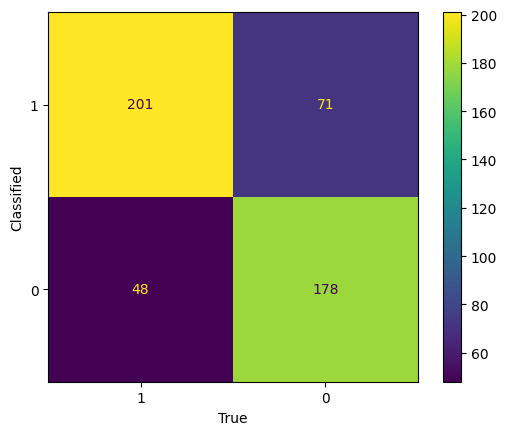

,Sensitividade,Especificidade,Acurácia
0,0.807229,0.714859,0.761044


In [95]:
dados['phat'] = step_modelo.predict()

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=dados['stroke'],
                predicts=dados['phat'],
                cutoff=0.50)

In [96]:
dados_plotagem = espec_sens(observado = dados['stroke'],
                            predicts = dados['phat'])
dados_plotagem

,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.000000
2,0.02,0.995984,0.056225
3,0.03,0.991968,0.136546
4,0.04,0.991968,0.168675
...,...,...,...
96,0.96,0.000000,1.000000
97,0.97,0.000000,1.000000
98,0.98,0.000000,1.000000
99,0.99,0.000000,1.000000


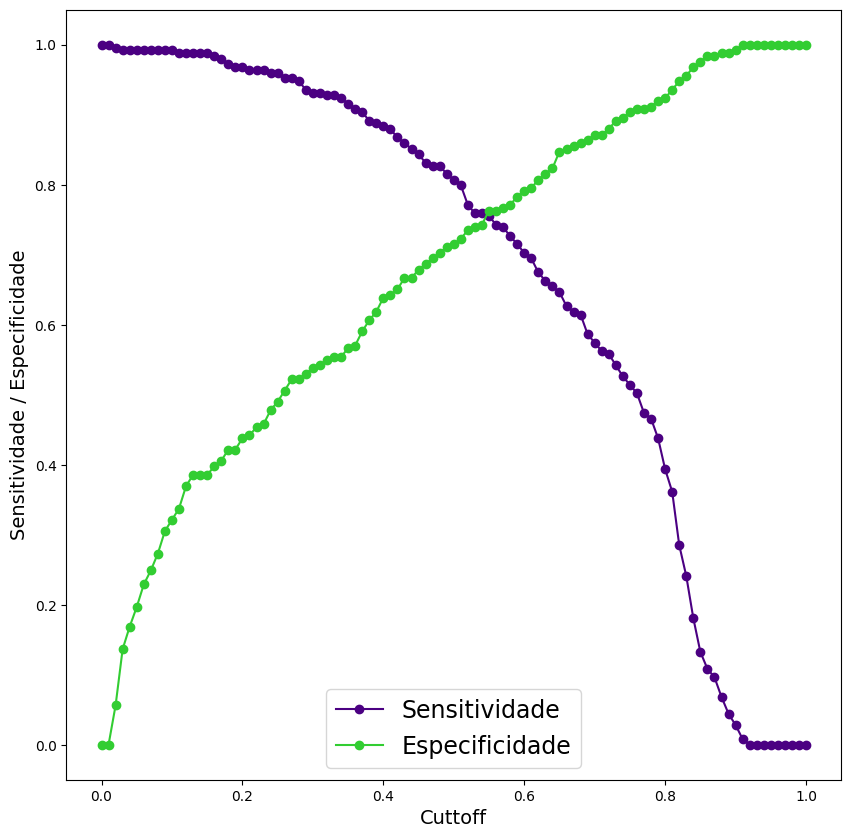

In [97]:
plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color='indigo')
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=14)
plt.ylabel('Sensitividade / Especificidade', fontsize=14)
plt.show()

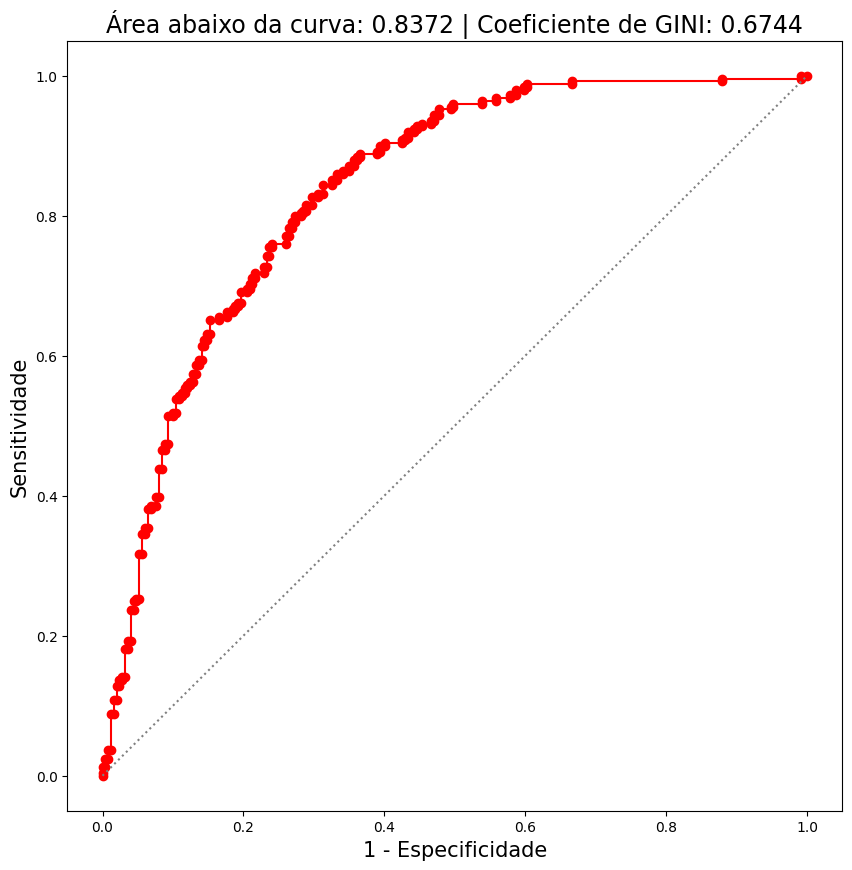

In [98]:
from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(dados['stroke'],
                                dados['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color='red')
plt.plot(fpr,fpr, ':', color='gray')
plt.title('Área abaixo da curva: %g' % round(roc_auc,4) +
          ' | Coeficiente de GINI: %g' % round(gini,4), fontsize=17)
plt.xlabel('1 - Especificidade', fontsize=15)
plt.ylabel('Sensitividade', fontsize=15)
plt.show()

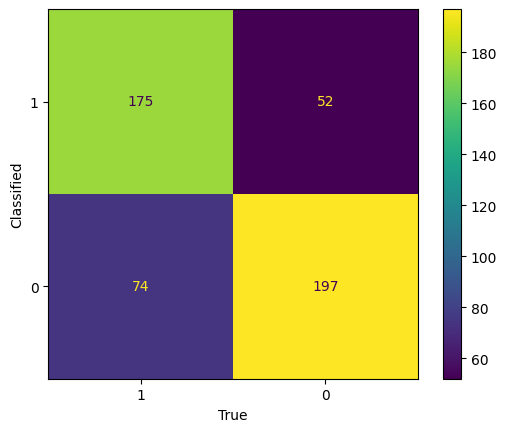

,Sensitividade,Especificidade,Acurácia
0,0.702811,0.791165,0.746988


In [99]:
dados['phat'] = step_modelo.predict()

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=dados['stroke'],
                predicts=dados['phat'],
                cutoff=0.60)